# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

In [ ]:
#Who: my audience include a diverse populaiton of AD physicians/clinicians, AD patients or risk group, and researcher in AD area. 
#What: the data will be used to build a model to predict the AD onset and progress and identify the most impactful factors from a wide range of variables.
#How: illustrate with longitudinal data of participants collected in the study centers, including neuroimaging data, genetic markers, cognitive test scores, demographics, and AD diagnosis. 

# 3. Homework - work with your own data

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

In [2]:
#load data

data = pd.read_csv("investigator_fcsf_nacc67.csv")
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3051 entries, 0 to 3050
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NACCADC   3051 non-null   int64  
 1   NACCID    3051 non-null   object 
 2   CSFABETA  3051 non-null   float64
 3   CSFPTAU   2751 non-null   float64
 4   CSFTTAU   2897 non-null   float64
 5   CSFLPMO   3051 non-null   int64  
 6   CSFLPDY   3051 non-null   int64  
 7   CSFLPYR   3051 non-null   int64  
 8   CSFABMO   2907 non-null   float64
 9   CSFABDY   2907 non-null   float64
 10  CSFABYR   2907 non-null   float64
 11  CSFABMD   3051 non-null   int64  
 12  CSFABMDX  1218 non-null   object 
 13  CSFPTMO   2623 non-null   float64
 14  CSFPTDY   2623 non-null   float64
 15  CSFPTYR   2623 non-null   float64
 16  CSFPTMD   2752 non-null   float64
 17  CSFPTMDX  1218 non-null   object 
 18  CSFTTMO   2759 non-null   float64
 19  CSFTTDY   2759 non-null   float64
 20  CSFTTYR   2759 non-null   floa

,NACCADC,CSFABETA,CSFPTAU,CSFTTAU,CSFLPMO,CSFLPDY,CSFLPYR,CSFABMO,CSFABDY,CSFABYR,CSFABMD,CSFPTMO,CSFPTDY,CSFPTYR,CSFPTMD,CSFTTMO,CSFTTDY,CSFTTYR,CSFTTMD
count,3051.000000,3051.000000,2751.000000,2897.000000,3051.000000,3051.000000,3051.000000,2907.000000,2907.000000,2907.000000,3051.000000,2623.000000,2623.000000,2623.000000,2752.000000,2759.000000,2759.000000,2759.000000,2898.000000
mean,5404.003933,514.932999,54.571770,329.265720,6.483120,15.445755,2011.450016,7.308910,18.307534,2015.828345,4.147165,7.305376,18.381243,2015.761723,4.485465,7.281986,18.413918,2015.762233,4.358523
std,3445.041035,354.578932,42.254037,347.097495,3.391498,8.555427,5.241171,2.596162,6.006565,4.834186,3.133684,2.515884,5.673038,5.050397,3.114524,2.541506,5.934661,4.939446,3.087298
min,354.000000,4.700000,3.500000,2.100000,1.000000,1.000000,1995.000000,1.000000,1.000000,2005.000000,1.000000,1.000000,1.000000,2005.000000,1.000000,1.000000,1.000000,2005.000000,1.000000
25%,2289.000000,238.715000,28.210000,75.690000,4.000000,8.000000,2007.000000,6.000000,15.000000,2011.000000,2.000000,6.000000,16.000000,2011.000000,2.000000,6.000000,16.000000,2011.000000,2.000000
50%,6499.000000,430.000000,41.100000,234.000000,6.000000,15.000000,2011.000000,8.000000,20.000000,2019.000000,2.000000,8.000000,20.000000,2020.000000,2.000000,8.000000,20.000000,2019.000000,2.000000
75%,8646.000000,698.000000,65.750000,444.000000,9.000000,23.000000,2016.000000,9.000000,20.000000,2020.000000,8.000000,8.000000,20.000000,2020.000000,8.000000,8.000000,20.000000,2020.000000,8.000000
max,8974.000000,2196.000000,340.300000,3406.880000,12.000000,31.000000,2022.000000,12.000000,31.000000,2023.000000,8.000000,12.000000,31.000000,2023.000000,8.000000,12.000000,31.000000,2023.000000,8.000000


In [7]:
#Are there any duplicate rows?

duplicates = data[data.duplicated()]

print(duplicates)

#No duplicated rows

Empty DataFrame
Columns: [NACCADC, NACCID, CSFABETA, CSFPTAU, CSFTTAU, CSFLPMO, CSFLPDY, CSFLPYR, CSFABMO, CSFABDY, CSFABYR, CSFABMD, CSFABMDX, CSFPTMO, CSFPTDY, CSFPTYR, CSFPTMD, CSFPTMDX, CSFTTMO, CSFTTDY, CSFTTYR, CSFTTMD, CSFTTMDX]
Index: []

[0 rows x 23 columns]


In [4]:
# Are there any duplicate values in a given column (when this would be inappropriate?)
duplicates2 = data[data[["NACCID", "CSFLPYR", "CSFABETA"]].duplicated(keep=False)]

print(duplicates2)

#No duplicates in certain columns that would be inappropriate

Empty DataFrame
Columns: [NACCADC, NACCID, CSFABETA, CSFPTAU, CSFTTAU, CSFLPMO, CSFLPDY, CSFLPYR, CSFABMO, CSFABDY, CSFABYR, CSFABMD, CSFABMDX, CSFPTMO, CSFPTDY, CSFPTYR, CSFPTMD, CSFPTMDX, CSFTTMO, CSFTTDY, CSFTTYR, CSFTTMD, CSFTTMDX]
Index: []

[0 rows x 23 columns]


In [12]:
#- What are the mean, median, and mode of each column?
#means:
data_mean = data.mean(numeric_only=True)
#median:
data_median = data.median(numeric_only=True)
#mode:
data_mode = data.mode(numeric_only=True).iloc[0]

print(data_mean)
print(data_median)
print(data_mode)

NACCADC     5404.003933
CSFABETA     514.932999
CSFPTAU       54.571770
CSFTTAU      329.265720
CSFLPMO        6.483120
CSFLPDY       15.445755
CSFLPYR     2011.450016
CSFABMO        7.308910
CSFABDY       18.307534
CSFABYR     2015.828345
CSFABMD        4.147165
CSFPTMO        7.305376
CSFPTDY       18.381243
CSFPTYR     2015.761723
CSFPTMD        4.485465
CSFTTMO        7.281986
CSFTTDY       18.413918
CSFTTYR     2015.762233
CSFTTMD        4.358523
dtype: float64
NACCADC     6499.0
CSFABETA     430.0
CSFPTAU       41.1
CSFTTAU      234.0
CSFLPMO        6.0
CSFLPDY       15.0
CSFLPYR     2011.0
CSFABMO        8.0
CSFABDY       20.0
CSFABYR     2019.0
CSFABMD        2.0
CSFPTMO        8.0
CSFPTDY       20.0
CSFPTYR     2020.0
CSFPTMD        2.0
CSFTTMO        8.0
CSFTTDY       20.0
CSFTTYR     2019.0
CSFTTMD        2.0
dtype: float64
NACCADC     8646.00
CSFABETA     310.00
CSFPTAU       24.00
CSFTTAU       46.26
CSFLPMO       10.00
CSFLPDY        8.00
CSFLPYR     2007.00
CSFABMO      

In [ ]:
# Are there any missing or null values?
#Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?
data.info()

#There are missing or null values of MRI data, probably because of unusable imaging data (e.g., participant motion in the scanner)
#The missing values will be handled through removing the missing rows given the high variability of data and importance of data quality for MRI measures. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3051 entries, 0 to 3050
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NACCADC   3051 non-null   int64  
 1   NACCID    3051 non-null   object 
 2   CSFABETA  3051 non-null   float64
 3   CSFPTAU   2751 non-null   float64
 4   CSFTTAU   2897 non-null   float64
 5   CSFLPMO   3051 non-null   int64  
 6   CSFLPDY   3051 non-null   int64  
 7   CSFLPYR   3051 non-null   int64  
 8   CSFABMO   2907 non-null   float64
 9   CSFABDY   2907 non-null   float64
 10  CSFABYR   2907 non-null   float64
 11  CSFABMD   3051 non-null   int64  
 12  CSFABMDX  1218 non-null   object 
 13  CSFPTMO   2623 non-null   float64
 14  CSFPTDY   2623 non-null   float64
 15  CSFPTYR   2623 non-null   float64
 16  CSFPTMD   2752 non-null   float64
 17  CSFPTMDX  1218 non-null   object 
 18  CSFTTMO   2759 non-null   float64
 19  CSFTTDY   2759 non-null   float64
 20  CSFTTYR   2759 non-null   floa

In [ ]:
# Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)
#No other incosistent data was identified.

In [9]:
#Encode any categorical variables (e.g. with one-hot encoding.)
data[["CSFABMDX", "CSFPTMDX", "CSFTTMDX"]].value_counts()

data["CSFABMDX_new"] = np.where(data["CSFABMDX"].str.contains("lumipulse"), "Lumipulse", data["CSFABMDX"])
data["CSFPTMDX_new"] = np.where(data["CSFPTMDX"].str.contains("lumipulse"), "Lumipulse", data["CSFPTMDX"])
data["CSFTTMDX_new"] = np.where(data["CSFTTMDX"].str.contains("lumipulse"), "Lumipulse", data["CSFTTMDX"])

data[["CSFABMDX_new", "CSFPTMDX_new", "CSFTTMDX_new"]].value_counts()

CSFABMDX_new   CSFPTMDX_new   CSFTTMDX_new 
Lumipulse      Lumipulse      Lumipulse        2984
                              x                  53
Athena ADMark  Athena ADMark  Athena ADMark      14
Name: count, dtype: int64

In [ ]:
#### Conclusions:

# Are the data usable?  If not, find some new data!
#The data is usable but need to be merged with other tables (such as enrollment table) to provide additional info. 

# Do you need to modify or correct the data in some way?
#The MRI data can be standardized before modeling. Otherwise can be used directly. 

# Is there any class imbalance?  (Categories that have many more items than other categories).
#The detecting method is Lumipulse most of the time (n=2984), and only a few Athena ADMark (n=14)


CSFABMDX       CSFPTMDX       CSFTTMDX     
Lumipulse      Lumipulse      Lumipulse        1177
lumipulse      lumipulse      lumipulse          26
Athena ADMark  Athena ADMark  Athena ADMark      14
Lumipulse      lumipulse      lumipulse           1
Name: count, dtype: int64

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

<Axes: ylabel='Density'>

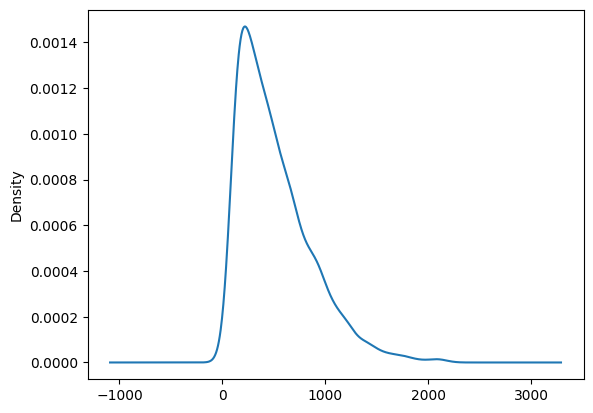

In [11]:
# Plot histogram to look at the distribution of beta amyolid in CSF
data["CSFABETA"].plot(kind = "density")

In [ ]:
#add the exploratary analysis and data preprocessing for thE CVD dataset for milestone project

In [3]:
pip install pandas openpyxl


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:

data = pd.read_excel('h244.xlsx', sheet_name= 'H244')

In [ ]:
data1 = data[['DUPERSID', 'AGEY1X', "ADSEX4", "PRVEVY1", "DIABDXY1_M18", "DIABDXY2_M18", 'DIABAGY1', 'DIABAGY2', 
              'ANGIDXY1', 'ANGIDXY2', 'CHDDXY1', 'CHDDXY2',
              'MIDXY1', 'MIDXY2',
              'TOTTCHY1', 'TOTTCHY2']]

In [6]:
data1.info()
data1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6741 entries, 0 to 6740
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   DUPERSID      6741 non-null   int64
 1   AGEY1X        6741 non-null   int64
 2   ADSEX4        6741 non-null   int64
 3   PRVEVY1       6741 non-null   int64
 4   DIABDXY1_M18  6741 non-null   int64
 5   DIABDXY2_M18  6741 non-null   int64
 6   DIABAGY1      6741 non-null   int64
 7   DIABAGY2      6741 non-null   int64
 8   ANGIDXY1      6741 non-null   int64
 9   ANGIDXY2      6741 non-null   int64
 10  ARTHDXY1      6741 non-null   int64
 11  ARTHDXY2      6741 non-null   int64
 12  CHDDXY1       6741 non-null   int64
 13  CHDDXY2       6741 non-null   int64
 14  MIDXY1        6741 non-null   int64
 15  MIDXY2        6741 non-null   int64
 16  TOTTCHY1      6741 non-null   int64
 17  TOTTCHY2      6741 non-null   int64
dtypes: int64(18)
memory usage: 948.1 KB


,DUPERSID,AGEY1X,ADSEX4,PRVEVY1,DIABDXY1_M18,DIABDXY2_M18,DIABAGY1,DIABAGY2,ANGIDXY1,ANGIDXY2,ARTHDXY1,ARTHDXY2,CHDDXY1,CHDDXY2,MIDXY1,MIDXY2,TOTTCHY1,TOTTCHY2
count,6.741000e+03,6741.000000,6741.000000,6741.000000,6741.000000,6741.000000,6741.000000,6741.000000,6741.000000,6741.000000,6741.000000,6741.000000,6741.000000,6741.000000,6741.000000,6741.000000,6.741000e+03,6.741000e+03
mean,2.684728e+09,43.579884,-0.034713,1.396084,1.849132,1.833259,4.385551,4.264204,1.401276,1.371310,1.176680,1.150571,1.364634,1.335113,1.384068,1.353360,1.747417e+04,1.714205e+04
std,2.747554e+06,24.418988,2.751096,0.535180,0.479176,0.526252,16.548172,16.370046,1.197150,1.219379,1.151091,1.169606,1.204697,1.225954,1.190008,1.217351,5.765822e+04,5.448039e+04
min,2.680001e+09,-1.000000,-15.000000,-1.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-1.000000e+00,-1.000000e+00
25%,2.682340e+09,23.000000,-1.000000,1.000000,2.000000,2.000000,-1.000000,-1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,5.820000e+02,4.260000e+02
50%,2.684729e+09,46.000000,1.000000,1.000000,2.000000,2.000000,-1.000000,-1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.813000e+03,2.488000e+03
75%,2.687099e+09,64.000000,2.000000,2.000000,2.000000,2.000000,-1.000000,-1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.064200e+04,1.114300e+04
max,2.689506e+09,85.000000,2.000000,2.000000,2.000000,2.000000,85.000000,85.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.742563e+06,1.304094e+06


In [7]:
print(len(data1[data1['AGEY1X'] == -1]))
print(len(data1[data1['TOTTCHY1'] == -1]))

125
53


In [8]:
#Are there any duplicate rows?

duplicates = data1[data1.duplicated()]

print(duplicates)

#No duplicated rows

Empty DataFrame
Columns: [DUPERSID, AGEY1X, ADSEX4, PRVEVY1, DIABDXY1_M18, DIABDXY2_M18, DIABAGY1, DIABAGY2, ANGIDXY1, ANGIDXY2, ARTHDXY1, ARTHDXY2, CHDDXY1, CHDDXY2, MIDXY1, MIDXY2, TOTTCHY1, TOTTCHY2]
Index: []


In [9]:
# Are there any duplicate values in a given column (when this would be inappropriate?)
duplicates2 = data1[data1[["DUPERSID"]].duplicated(keep=False)]

print(duplicates2)

#no duplicated person id

Empty DataFrame
Columns: [DUPERSID, AGEY1X, ADSEX4, PRVEVY1, DIABDXY1_M18, DIABDXY2_M18, DIABAGY1, DIABAGY2, ANGIDXY1, ANGIDXY2, ARTHDXY1, ARTHDXY2, CHDDXY1, CHDDXY2, MIDXY1, MIDXY2, TOTTCHY1, TOTTCHY2]
Index: []


In [10]:
#- What are the mean, median, and mode of each column?
#means:
data_mean = data1.mean(numeric_only=True)
#median:
data_median = data1.median(numeric_only=True)
#mode:
data_mode = data1.mode(numeric_only=True).iloc[0]

print(data_mean)
print(data_median)
print(data_mode)

DUPERSID        2.684728e+09
AGEY1X          4.357988e+01
ADSEX4         -3.471295e-02
PRVEVY1         1.396084e+00
DIABDXY1_M18    1.849132e+00
DIABDXY2_M18    1.833259e+00
DIABAGY1        4.385551e+00
DIABAGY2        4.264204e+00
ANGIDXY1        1.401276e+00
ANGIDXY2        1.371310e+00
ARTHDXY1        1.176680e+00
ARTHDXY2        1.150571e+00
CHDDXY1         1.364634e+00
CHDDXY2         1.335113e+00
MIDXY1          1.384068e+00
MIDXY2          1.353360e+00
TOTTCHY1        1.747417e+04
TOTTCHY2        1.714205e+04
dtype: float64
DUPERSID        2.684729e+09
AGEY1X          4.600000e+01
ADSEX4          1.000000e+00
PRVEVY1         1.000000e+00
DIABDXY1_M18    2.000000e+00
DIABDXY2_M18    2.000000e+00
DIABAGY1       -1.000000e+00
DIABAGY2       -1.000000e+00
ANGIDXY1        2.000000e+00
ANGIDXY2        2.000000e+00
ARTHDXY1        2.000000e+00
ARTHDXY2        2.000000e+00
CHDDXY1         2.000000e+00
CHDDXY2         2.000000e+00
MIDXY1          2.000000e+00
MIDXY2          2.000000e+00

In [ ]:
#missing values for 
print(data1[["ADSEX4"]].value_counts())
print(data1[["PRVEVY1"]].value_counts())
print(data1[["DIABDXY1_M18"]].value_counts())
print(data1[["ANGIDXY1"]].value_counts())
print(data1[["CHDDXY1"]].value_counts())
print(data1[["MIDXY1"]].value_counts())

ADSEX4
-1        3070
 2        1917
 1        1582
-15        172
Name: count, dtype: int64
PRVEVY1
 1         3912
 2         2776
-1           53
Name: count, dtype: int64
DIABDXY1_M18
 2              5910
 1               745
-1                84
-8                 2
Name: count, dtype: int64
ANGIDXY1
 2          5322
-1          1295
 1           121
-8             3
Name: count, dtype: int64
ARTHDXY1
 2          3799
 1          1645
-1          1295
-8             2
Name: count, dtype: int64
CHDDXY1
 2         5093
-1         1295
 1          348
-8            5
Name: count, dtype: int64
MIDXY1
 2        5197
-1        1295
 1         247
-8           2
Name: count, dtype: int64


In [ ]:
print(data1[["ADSEX4"]].value_counts(normalize=True))
print(data1[["PRVEVY1"]].value_counts(normalize=True))
print(data1[["DIABDXY1_M18"]].value_counts(normalize=True))
print(data1[["ANGIDXY1"]].value_counts(normalize=True))
print(data1[["CHDDXY1"]].value_counts(normalize=True))
print(data1[["MIDXY1"]].value_counts(normalize=True))

ADSEX4
-1        0.455422
 2        0.284379
 1        0.234683
-15       0.025516
Name: proportion, dtype: float64
PRVEVY1
 1         0.580329
 2         0.411808
-1         0.007862
Name: proportion, dtype: float64
DIABDXY1_M18
 2              0.876725
 1              0.110518
-1              0.012461
-8              0.000297
Name: proportion, dtype: float64
ANGIDXY1
 2          0.789497
-1          0.192108
 1          0.017950
-8          0.000445
Name: proportion, dtype: float64
ARTHDXY1
 2          0.563566
 1          0.244029
-1          0.192108
-8          0.000297
Name: proportion, dtype: float64
CHDDXY1
 2         0.755526
-1         0.192108
 1         0.051624
-8         0.000742
Name: proportion, dtype: float64
MIDXY1
 2        0.770954
-1        0.192108
 1        0.036641
-8        0.000297
Name: proportion, dtype: float64


In [13]:
#code the missing values
data1 = data1.replace(-1, np.nan)
data1 = data1.replace(-8, np.nan)
data1 = data1.replace(-15, np.nan)

In [1]:
data[data['TOTTCHY1']>50000]

NameError: name 'data' is not defined

In [14]:
#save the dataset
data1.to_csv("CVD_data.csv", index=False)